In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('reorder.csv','r') as f:
    lines = f.readlines()
    
info = {}
for l in lines:
    a = [a.strip() for a in l.split(',')]
    if a[0] not in info:
        info[a[0]] = {}
    if a[1] not in info[a[0]]:
        info[a[0]][a[1]] = [[],[],[]]
    info[a[0]][a[1]][0].append(a[2])
    info[a[0]][a[1]][1].append(a[3])
    info[a[0]][a[1]][2].append(a[4])
    
for a in info.keys():
    for b in info[a].keys():
        info[a][b][0] = np.mean([float(i) for i in info[a][b][0]])
        info[a][b][1] = np.mean([float(i) for i in info[a][b][1]])
        info[a][b][2] = np.mean([float(i) for i in info[a][b][2]])

In [6]:
print(info.keys())
print(info['./ijk'].keys())
print(info['./ijk']['32'])

dict_keys(['./kij', './kji', './ijk', './nosum', './jki', './ikj', './transpose', './jik'])
dict_keys(['2', '4', '8', '16', '32', '64', '128', '256', '512', '1024'])
[0.1009466, 0.6497999999999999, 208.319992]


In [10]:
times = {}
for key in info.keys():
    times[key] = []
    for k in info[key].keys():
        times[key].append(info[key][k][0])

In [11]:
print(times)

{'./kij': [0.00042919999999999997, 0.0003816, 0.0021932, 0.015783200000000004, 0.1201634, 0.9385584, 7.4033738, 60.8295918, 486.166382, 3928.0869486], './kji': [0.0002384, 0.0002384, 0.0021456, 0.0157832, 0.12798320000000002, 0.9974001999999998, 9.0290072, 111.473942, 1068.7654017999998, 13149.4635106], './ijk': [0.00042919999999999997, 0.0007632, 0.0020026, 0.012827, 0.1009466, 0.7593156000000001, 6.742429800000001, 74.74594119999999, 757.8712464, 6392.3061848], './nosum': [0.0008108000000000001, 0.00062, 0.0030514, 0.017738000000000004, 0.144863, 1.1292456, 9.697198799999999, 108.7491512, 1083.7899686, 10522.980547], './jki': [0.000763, 0.0003816, 0.0020978, 0.0160216, 0.1272678, 0.9960174, 8.9078426, 105.8273314, 1053.1220436, 13266.649627800001], './ikj': [0.00042919999999999997, 0.00062, 0.0024794000000000005, 0.01564, 0.12021080000000002, 0.9345055999999999, 7.390499, 59.50717920000001, 477.23417259999997, 3832.6130866], './transpose': [0.0013830000000000001, 0.0010016, 0.0030038

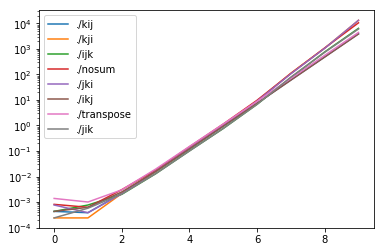

In [13]:
for key in times:
    plt.plot(times[key],label=key)
plt.legend()
plt.yscale('log')
plt.show()